<a href="https://colab.research.google.com/github/AnuragAgarwal00/machine_learning_wine-dataset/blob/main/feature_extraction_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df_wine = pd.read_csv(
  'https://archive.ics.uci.edu/ml/'
  'machine-learning-databases/wine/wine.data',
  header=None
 )

In [2]:
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std =std.fit_transform(X_train)
X_test_std = std.transform(X_test)

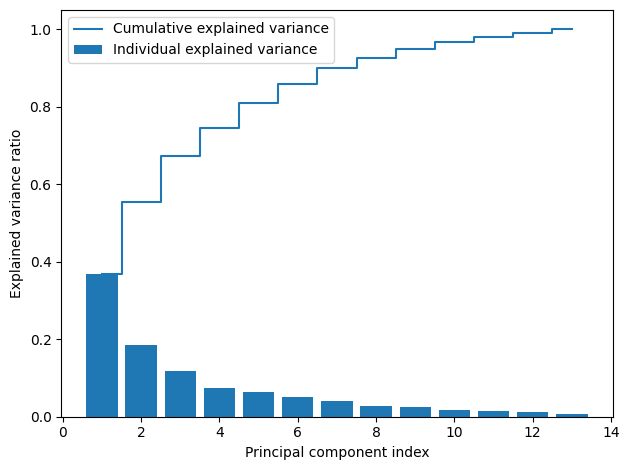

In [4]:
import numpy as np
covariance = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eigh(covariance)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, align='center',
label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [5]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [6]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [7]:
X_train_std[0].dot(w)

array([ 2.38299011, -0.45458499])

In [8]:
X_train_pca = X_train_std.dot(w)

In [ ]:
X_train_pca.shape

(124, 2)

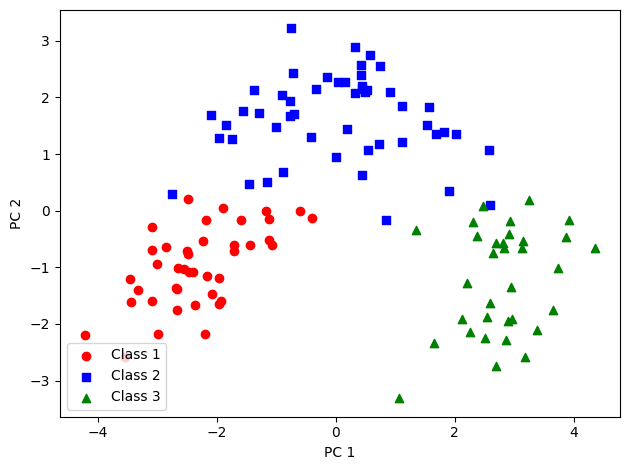

In [9]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==l, 0],
  X_train_pca[y_train==l, 1],
  c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import numpy as np

In [11]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # setup marker generator and color map
  import numpy as np
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  #  plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
    y=X[y == cl, 1],
    alpha=0.8,
    c=colors[idx],
    marker=markers[idx],
    label=f'Class {cl}',
    edgecolor='black')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


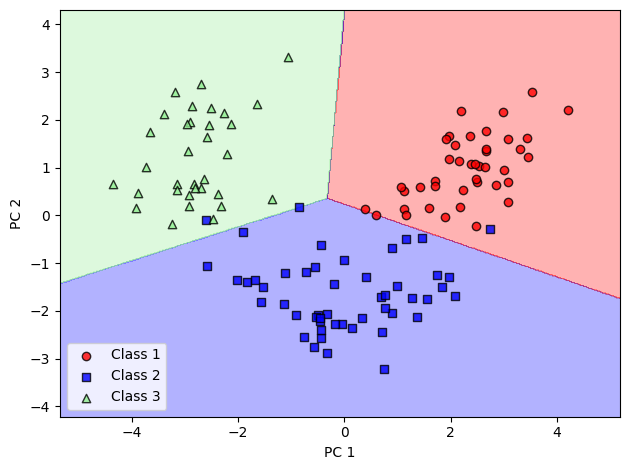

In [13]:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [14]:
# If we are interested in the explained variance ratios of the different principal components, we can
# simply initialize the PCA class with the n_components parameter set to None, so all principal components
# are kept and the explained variance ratio can then be accessed via the explained_variance_ratio_
# attribute:

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [15]:
# how much each feature contribute to the Principal Components - corelation - loadings
loadings = eigen_vecs * np.sqrt(eigen_vals)

In [18]:
loadings.shape

(13, 13)

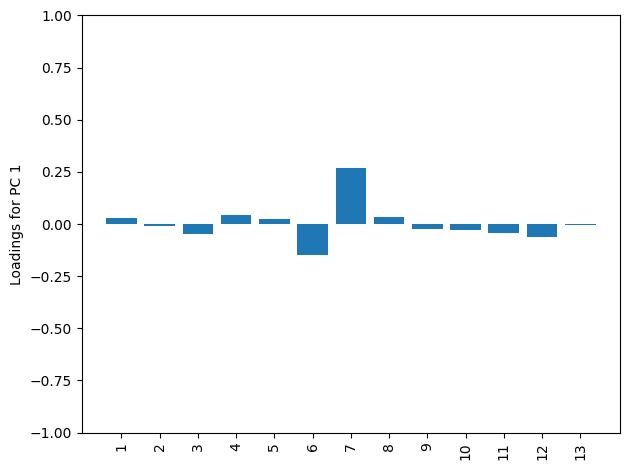

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [22]:
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:].values, rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()
#Alchohol has -ve corerealtion, Malic acid +ve cor

In [27]:
#sklearn loadings #eigenvectors * eigen_values
sklearn_loadings = pca.components_.T  * np.sqrt(pca.explained_variance_)

(13, 13)

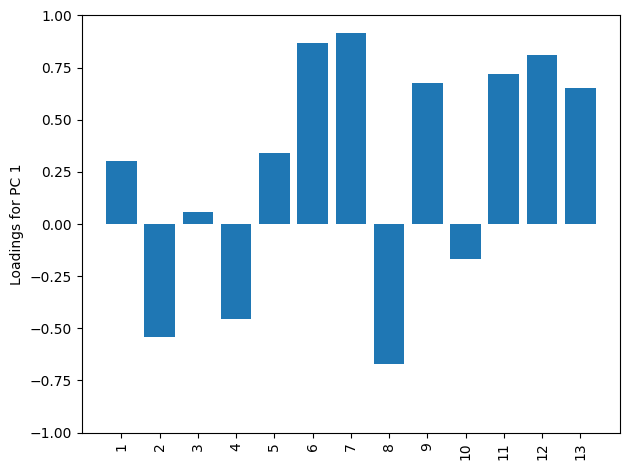

In [29]:
fig, ax = plt.subplots()
ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()